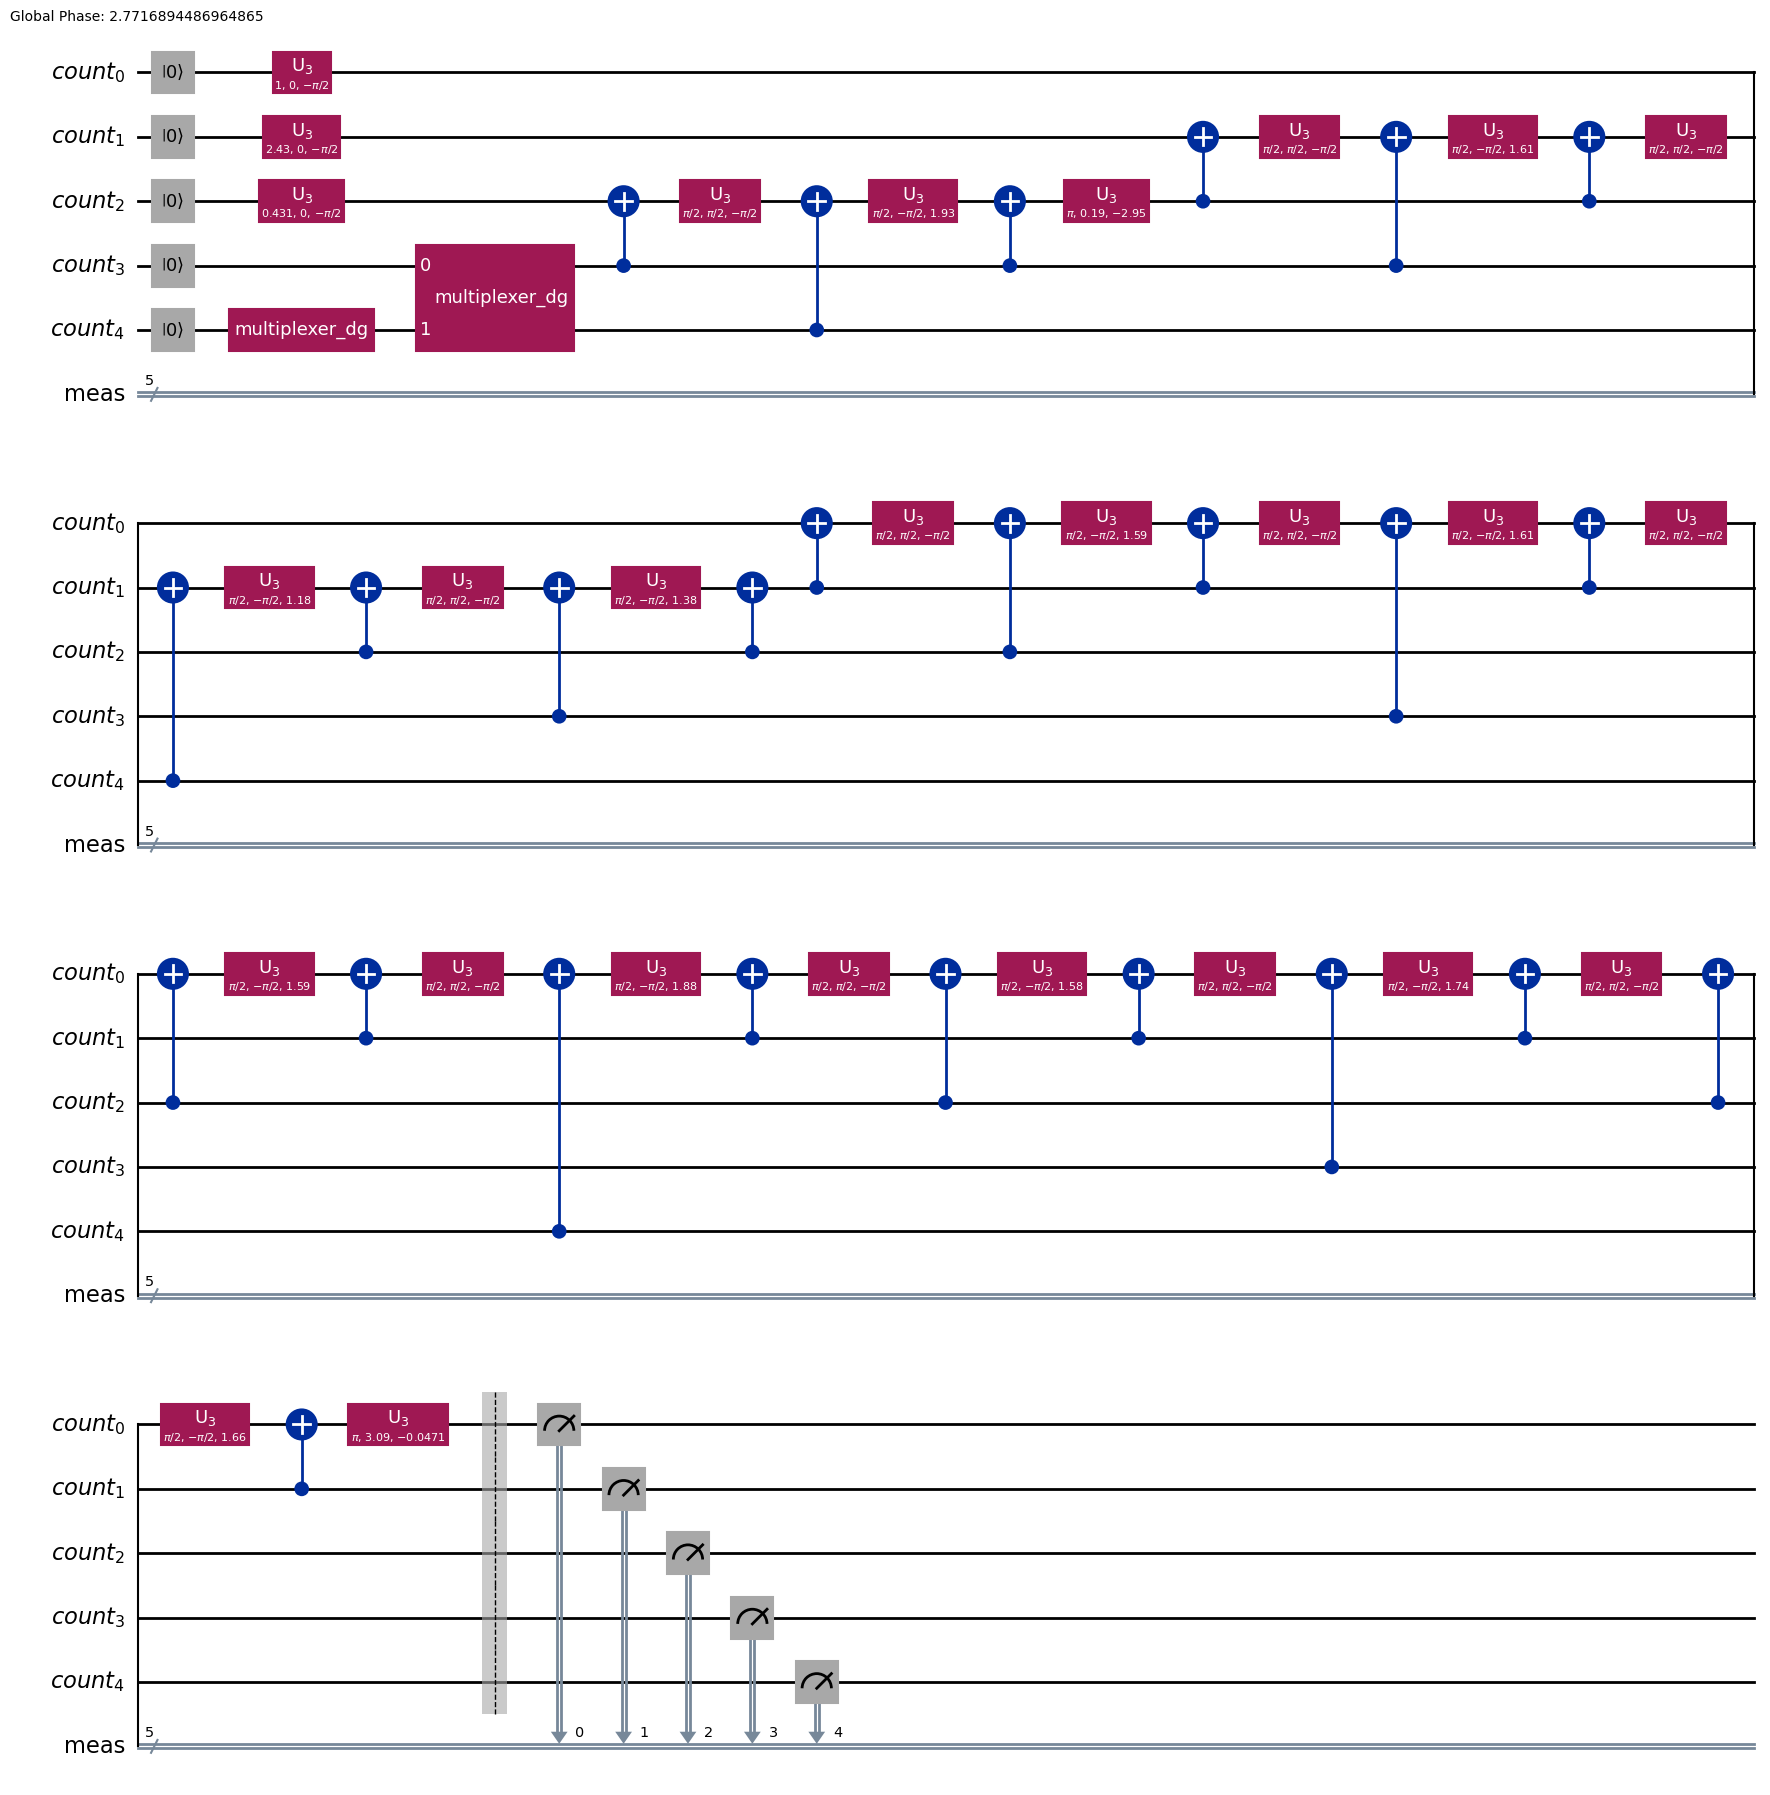

In [1]:
from qiskit import QuantumCircuit, QuantumRegister, transpile
from scipy.stats import binom
import numpy as np

n = 31
p = 0.5

qubits = n.bit_length()
amplitudes = [np.sqrt(binom.pmf(i, n, p)) for i in range(2**qubits)]
count_register = QuantumRegister(qubits, "count")
circuit = QuantumCircuit(count_register)
circuit.initialize(amplitudes, count_register)
circuit.measure_all()

transpile(circuit.decompose()).draw("mpl")

In [ ]:
from qiskit_aer import AerSimulator


simulator = AerSimulator()
circ = transpile(circuit, simulator)

result = simulator.run(circ, shots=10000).result()
counts = result.get_counts(circ)
total = sum(counts.values())
proportions = {k: v/total for k, v in counts.items()}

In [ ]:
import pandas as pd


data = {"x": [], "proportion": []}
for i in range(n):
    integer_x = i
    bin_x = bin(integer_x)[2:].zfill(qubits)
    data["x"].append(integer_x)
    data["proportion"].append(proportions.get(bin_x, 0))
    # norm.pdf(integer_x, mu, sigma)

data = pd.DataFrame(data).query("proportion != 0").reset_index(drop="index").reset_index()

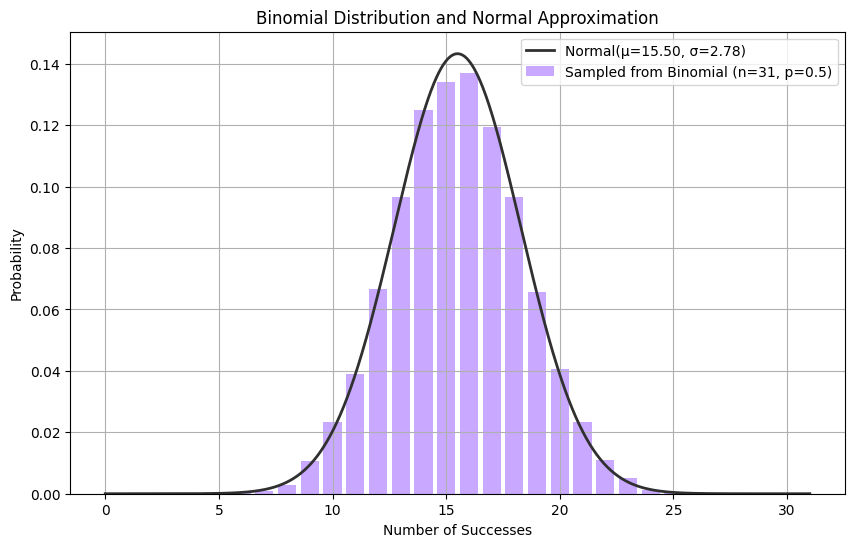

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm


# Normal approximation
mu = n * p
sigma = np.sqrt(n * p * (1 - p))

x_norm = np.linspace(0, n, 1000)
normal_pdf = norm.pdf(x_norm, mu, sigma)


plt.figure(figsize=(10, 6))
plt.bar(data["x"], data["proportion"], width=0.8, label=f'Sampled from Binomial (n={n}, p={p})', alpha=0.6, color='#a570ff')#303030
plt.plot(x_norm, normal_pdf, label=f'Normal(μ={mu:.2f}, σ={sigma:.2f})', color='#303030', lw=2)


plt.title('Binomial Distribution and Normal Approximation')
plt.xlabel('Number of Successes')
plt.ylabel('Probability')
plt.legend()
plt.grid(True)

plt.show()